In [1]:
"""
Sean Bittner, June 4, 2017
The objective of this task is to get familiar with the predominant tools
for developing reward learning algorithms.

1.) AI Gym - OpenAI repo for reward learning environments intended for
            making controlled comparisons of reward learning algorithms.
    https://gym.openai.com/

2.) AI Baselines - OpenAI repo for reward learning algorithms.  So far,
                   only the code for DQN training has been posted. Here,
                   we'll use it for a performance reference point.
    https://blog.openai.com/openai-baselines-dqn/

    Note: AI Baselines is written in python 3.  If you have python 2.7
          as your main install, I suggest using a virtual environment
          for this repo.  See link.
          http://joebergantine.com/blog/2015/apr/30/installing-python-2-and-python-3-alongside-each-ot/

          I recommend appending these two lines to your bin/activate
          script if you follow the instructions
          unset PYTHONPATH
          export PYTHONPATH=<base directory of your virtual env>

"""        
%matplotlib inline

import os
import gym
from baselines import deepq
import numpy as np
from matplotlib import pyplot as plt
import itertools

env = gym.make("CartPole-v0")

num_eps = 10;
max_its = 1000;
reward_trained = np.zeros((num_eps,));
reward_random = np.zeros((num_eps,));
act = None;


[2017-06-06 23:56:28,812] Making new env: CartPole-v0


In [2]:
model = deepq.models.mlp([64])
act = deepq.learn(
    env,
    q_func=model,
    lr=1e-3,
    max_timesteps=20000,
    buffer_size=20000,
    exploration_fraction=0.1,
    exploration_final_eps=0.02,
    print_freq=10,
    callback=None
)

act.save('cp.pkl');

[2017-06-06 23:56:28,942] VARIABLES collection name is deprecated, please use GLOBAL_VARIABLES instead; VARIABLES will be removed after 2017-03-02.


[2017-06-06 23:56:28,982] VARIABLES collection name is deprecated, please use GLOBAL_VARIABLES instead; VARIABLES will be removed after 2017-03-02.


--------------------------------------
| steps                   | 148      |
| episodes                | 10       |
| mean 100 episode reward | 16.6     |
| % time spent exploring  | 92       |
--------------------------------------
--------------------------------------
| steps                   | 318      |
| episodes                | 20       |
| mean 100 episode reward | 16.8     |
| % time spent exploring  | 84       |
--------------------------------------


/Users/sbittner/Documents/Code-Challenge/main/RL/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/sbittner/Documents/Code-Challenge/main/RL/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


--------------------------------------
| steps                   | 496      |
| episodes                | 30       |
| mean 100 episode reward | 17.1     |
| % time spent exploring  | 75       |
--------------------------------------
--------------------------------------
| steps                   | 651      |
| episodes                | 40       |
| mean 100 episode reward | 16.7     |
| % time spent exploring  | 68       |
--------------------------------------
--------------------------------------
| steps                   | 783      |
| episodes                | 50       |
| mean 100 episode reward | 16       |
| % time spent exploring  | 61       |
--------------------------------------
--------------------------------------
| steps                   | 908      |
| episodes                | 60       |
| mean 100 episode reward | 15.4     |
| % time spent exploring  | 55       |
--------------------------------------
--------------------------------------
| steps                  

[2017-06-06 23:57:06,211] Restoring parameters from /var/folders/dl/tnt_bhk130sg216kffjpw2040000gn/T/tmpulsr8mk_/model


In [3]:
# Visualize performance of random model
observation = env.reset()
ep_ind = 0;
count = 0;
print('episode 1')
for i in itertools.count():
    count += 1;
    env.render()
    action = env.action_space.sample();
    observation, reward, done, info = env.step(action);
    if done:
        reward_random[ep_ind] = count;
        count = 0;
        observation = env.reset();
        ep_ind = ep_ind + 1;
        if (ep_ind == num_eps):
            break
        print('episode %d' % (ep_ind+1));

        

episode 1
episode 2
episode 3
episode 4
episode 5
episode 6
episode 7
episode 8
episode 9
episode 10


In [4]:
# Visualize performance of trained model
if act is None:
    act = deepq.load('cp.pkl');
    
observation = env.reset()
ep_ind = 0;
count = 0;
print('episode 1')
for i in itertools.count():
    count += 1;
    env.render()
    action = act(observation[None])[0];
    observation, reward, done, info = env.step(action);
    if done:
        reward_trained[ep_ind] = count;
        count = 0;
        observation = env.reset();
        ep_ind = ep_ind + 1;
        if (ep_ind == num_eps):
            break
        print('episode %d' % (ep_ind+1));


episode 1
episode 2
episode 3
episode 4
episode 5
episode 6
episode 7
episode 8
episode 9
episode 10


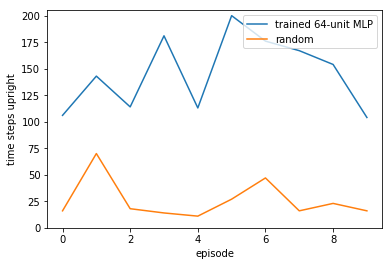

In [5]:
# We have visualized a random player and a trained player.
# Let's compare their performance across 10 episodes.

plt.figure();
plt.plot(reward_trained);
plt.plot(reward_random);
plt.ylim([0,205]);
plt.xlabel('episode');
plt.ylabel('time steps upright');
plt.legend(['trained 64-unit MLP', 'random']);
